<a href="https://colab.research.google.com/github/abhisheksahanii/abalone-knn-logistic/blob/main/Abalone_KNN_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/abalone.csv')
data.head()





,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:

data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Preprocessing
add Codeadd Markdown
Now, Find out if your Dataset has any null values.Because your model will not give you proper accuracy when your data has NA's in them.

In [ ]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
# Drop NA rows
data.dropna(inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
data.shape

(4177, 9)

In [ ]:
data[data['Height'] == 0]  #need to drop these rows.
data.drop(index=[1257,3996], inplace = True)
data.shape

(4175, 9)

In [ ]:
data['age'] = data['Rings']+1.5 #AS per the problem statement
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [ ]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,11.435090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,9.500000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,12.500000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
data.drop(['Diameter', 'Shucked weight', 'Viscera weight', 'Shell weight'], axis=1, inplace = True)

In [ ]:
data.head()

,Sex,Length,Height,Whole weight,age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


In [ ]:
Age = []
for i in data["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
data["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
data.head()

,Sex,Length,Height,Whole weight,age
0,M,0.455,0.095,0.5140,1
1,M,0.350,0.090,0.2255,1
2,F,0.530,0.135,0.6770,2
3,M,0.440,0.125,0.5160,1
4,I,0.330,0.080,0.2050,1


In [ ]:
new_df = pd.get_dummies(data, columns = ['Sex'], prefix_sep='_', drop_first = True)
new_df['age'].value_counts()

1    1534
3    1473
2    1168
Name: age, dtype: int64

### Split the Data
So, finally we scaled down the data and the next step is to split the dataset into train and test sets

In [ ]:
new_df['length'] = np.sqrt(new_df['Length'])
X = new_df.drop('age', axis = 1)
y = new_df['age']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [ ]:
x_train.shape

(3340, 6)

In [ ]:
x_train.head()

,Length,Height,Whole weight,Sex_I,Sex_M,length
3846,0.370,0.085,0.2045,1,0,0.608276
433,0.545,0.140,0.7505,0,1,0.738241
3797,0.695,0.200,1.8995,0,1,0.833667
3324,0.375,0.100,0.2565,1,0,0.612372
859,0.595,0.160,1.2095,0,0,0.771362


In [ ]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

### KNN Model Train
Once after you have splitted the dataset into training and test dataset, our task is to train the model with your training data. Since, I dont know the value of K correctly, I estimate the value of K as 1 and train the model. Later on you can find the value of K using the Elbow method and replace it with K to improve your model accuracy.

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred

array([3, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2,
       3, 1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 1, 2, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 1, 1, 1,
       1, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 3, 1, 2, 3, 1, 2, 1, 2,
       2, 2, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 1,
       1, 2, 3, 3, 1, 1, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3,
       1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 3, 1, 3, 3, 2, 2,
       1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 2,
       1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 3, 1, 3,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1,
       1, 3, 2, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 3,

### Confusion Matrix


In [ ]:
confusion_matrix(y_test, pred)

array([[308,   0,   0],
       [  4, 221,   3],
       [  1,   0, 298]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       308
           2       1.00      0.97      0.98       228
           3       0.99      1.00      0.99       299

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(random_state = 0)
model2.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
pred2 = model2.predict(x_test)


In [ ]:
pred2


array([3, 1, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2,
       3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 1, 2, 1, 1, 3, 1, 3,
       1, 1, 3, 3, 2, 2, 1, 3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 3, 3, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 3, 3, 1, 3, 3, 1, 1, 1,
       1, 1, 3, 1, 2, 3, 1, 2, 3, 1, 1, 1, 2, 2, 3, 1, 2, 3, 1, 2, 1, 2,
       2, 2, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2,
       1, 2, 3, 3, 1, 1, 2, 3, 2, 2, 3, 3, 1, 3, 3, 3, 2, 1, 1, 3, 2, 3,
       1, 1, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2,
       1, 3, 1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 2,
       1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 3, 2, 2, 1,
       1, 3, 2, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 2, 1, 2, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 1, 2, 1, 3, 3, 2, 2, 1, 1, 3,

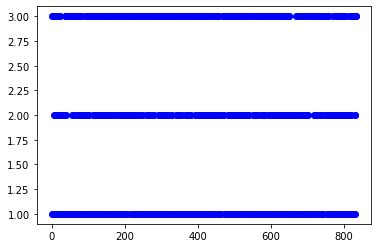

In [ ]:
plt.plot(range(len(x_test)),y_test,'o',c='b')

In [ ]:
confusion_matrix(y_test, pred2)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       308
           2       0.99      0.98      0.98       228
           3       1.00      0.99      0.99       299

    accuracy                           0.99       835
   macro avg       0.99      0.99      0.99       835
weighted avg       0.99      0.99      0.99       835

